<a href="https://colab.research.google.com/github/ugurtegin/Nonlinear_MMF_Network/blob/main/Simulations/SimNEW_COVID_19_CTImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import tensorflow as tf


from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Activation, LSTM
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical


# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# Load and create normalized intensity images

res_sq_flt=np.zeros((2481,484))
for ugur in range(2480):
  f = sio.loadmat('/content/drive/MyDrive/Optical DNN Project/Mustafa COVID DATA/data_pow10e6ugur/data'+str(ugur)+'.mat')
  Ain = f['flattened']
  res_sq_flt[ugur] = Ain


sio.savemat('/content/drive/MyDrive/Optical DNN Project/Mustafa COVID DATA/data_pow10e6ugur/res_sq_flt2_2.mat',{'res_sq_flt':res_sq_flt})

In [17]:
import scipy.io as sio
#f = sio.loadmat('/content/drive/MyDrive/res_sq_flt2_2.mat')
#inp = f['res_sq_flt']
inp = res_sq_flt

#Load data
f2 = sio.loadmat('/content/drive/MyDrive/Optical DNN Project/Mustafa COVID DATA/label.mat')

out = f2['label']

In [18]:
input_data = inp
output_data = out

print('input_data : ', input_data.shape, input_data.dtype)
print('output_class : ', output_data.shape, output_data.dtype)
print()

input_data :  (2481, 484) float64
output_class :  (2481, 1) uint8



In [19]:
input_data.shape

(2481, 484)

In [20]:
oran = 0.20
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=oran)

print('Test data : ', X_test.shape, X_test.dtype)
print('Training data : ', X_train.shape, X_train.dtype)
print()

Test data :  (497, 484) float64
Training data :  (1984, 484) float64



In [21]:
model = Sequential()
model.add(Dense(1, input_dim=484, activation='sigmoid'))

In [22]:
loss='binary_crossentropy'
metrics = ['accuracy']  # network accuracy metric to be determined after each epoch

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt2, loss=loss, metrics=metrics)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 485       
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [23]:
#setting final parameters for the network and it begins to train
number_of_iterations = 30
batch_size = 50

#history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=number_of_iterations, verbose=1, validation_data=(X_test, y_test))
#Number of iterations run: 900

Epoch 1/30
40/40 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4950 - val_loss: 0.6884 - val_accuracy: 0.5010
Epoch 2/30
40/40 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5494 - val_loss: 0.6729 - val_accuracy: 0.5875
Epoch 3/30
40/40 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6154 - val_loss: 0.6601 - val_accuracy: 0.6821
Epoch 4/30
40/40 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.6512 - val_loss: 0.6498 - val_accuracy: 0.6942
Epoch 5/30
40/40 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.6729 - val_loss: 0.6422 - val_accuracy: 0.7002
Epoch 6/30
40/40 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.6910 - val_loss: 0.6335 - val_accuracy: 0.7203
Epoch 7/30
40/40 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.6935 - val_loss: 0.6257 - val_accuracy: 0.7264
Epoch 8/30
40/40 [==

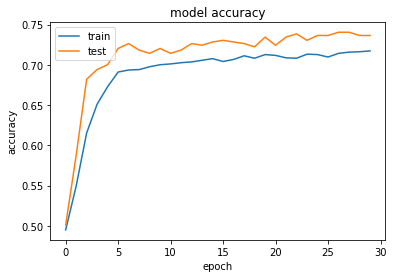

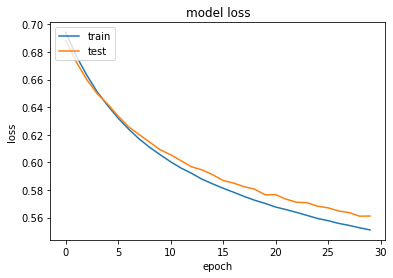

In [24]:
from google.colab import files
ac=plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
ac.show()
#ac.savefig('acc-1.png')
#files.download('acc-1.png')

# summarize history for loss
ls=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
ls.show()
#ls.savefig('loss-1.png')
#files.download('loss-1.png')

In [25]:
sio.savemat('/content/drive/MyDrive/Optical DNN Project/Mustafa COVID DATA/data_pow10e6ugur/network_res.mat', {'y':out, 'X_test':X_test, 'X_train':X_train, 'y_test':y_test, 'y_train':y_train, 'acc':history.history['accuracy'], 'val_acc':history.history['val_accuracy'], 'loss':history.history['loss'], 'val_loss':history.history['val_loss']})

Confusion matrix, without normalization
[[209  58]
 [ 73 157]]


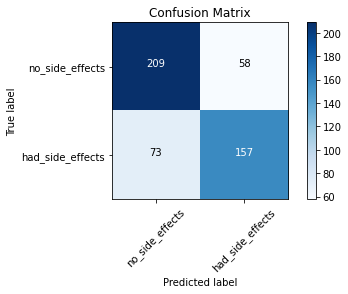

In [26]:
def plot_confusion_matrix(cm, classes,

                        normalize=False,

                        title='Confusion matrix',

                        cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')



    print(cm)



    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

            horizontalalignment="center",

            color="white" if cm[i, j] > thresh else "black")



    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')




%matplotlib inline

from sklearn.metrics import confusion_matrix

import itertools

import matplotlib.pyplot as plt



cm_plot_labels = ['no_side_effects','had_side_effects']



cm = confusion_matrix(y_true=y_test, y_pred=np.round(model.predict(X_test)))



plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

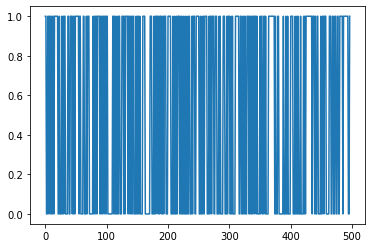

In [ ]:
y_pred=np.round(model.predict(X_test))
y_true=np.argmax(y_test,1)

plt.plot(y_pred)